# TP 2 : Lois continues 3M246 JAFUNO Douba

# 1 Méthode de la fonction de répartition inverse

In [1]:
from random import random
import matplotlib.pyplot as plt 
from math import log, exp, pi, tan, sin, cos

Une variable exponnentielle de paramètre 0.5:  0.9261438530098192


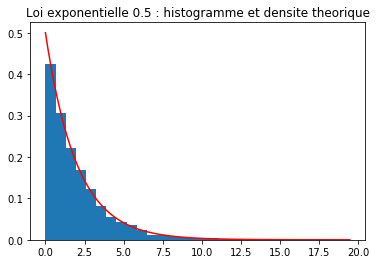

Une variable de cauchy:  2.655164836300569


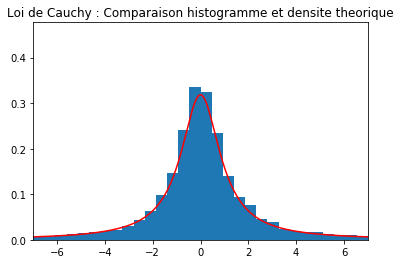

Une variable de pareto de paramètre 1:  7.807558874419533


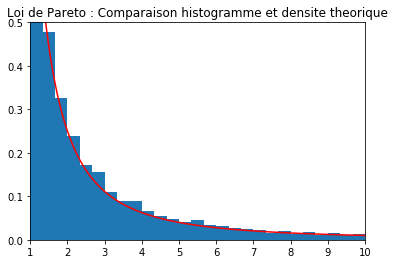

Une variable arcsinus:  0.8034945347272341


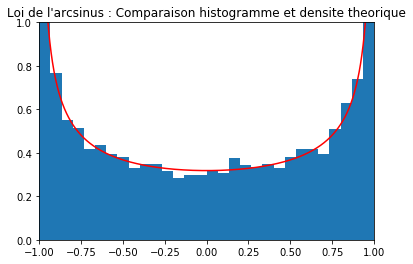

In [2]:
N = 10000 # Nombre de simulation
n = 1000 # taille de l' échantillon
#intervalle comme dans le cours 

#fonction qui simule une variable aleatoire de loi exponentielle de parametre lambda
def expo(lambdax):
    return -log(random())/lambdax

#test
print("Une variable exponnentielle de paramètre 0.5: ", expo(0.5) )

lam = 0.5
# l'histogramme
simu= [expo(lam) for i in range(N)]
plt.hist(simu, bins=30, density=True)

# la densite (sur l'intervalle [0,L])
L = max(simu)
x = [L*i/float(n) for i in range(n+1)]
plt.plot(x, [lam*exp(-lam*t) for t in x], 'r')
plt.title("Loi exponentielle 0.5 : histogramme et densite theorique")
plt.show()



#fonction qui simule une variable aleatoire de loi de Cauchy
def cauchy():
    return tan(pi*(random()-0.5))

#test
print("Une variable de cauchy: ", cauchy())

#l'histogramme (sur l'intervalle [-L,L])
L = 7
plt.hist([cauchy() for i in range(N)], bins=30, density=True, range=(-L,L))

# La densite
x = [L*i/float(n) for i in range(-n,n+1)]
plt.plot(x, [(1+t**2)**-1/pi for t in x], 'r')
plt.axis([-L,L,0,1.5/pi])
plt.title("Loi de Cauchy : Comparaison histogramme et densite theorique")
plt.show()



#fct qui simule une variable aleatoire de loi de Pareto de parametre theta
def pareto(theta):
    return random()**(-1./theta)
#test
print("Une variable de pareto de paramètre 1: ", pareto(1) )
theta=1

#l'histogramme sur [0,L]
L = 10
plt.hist([pareto(theta) for i in range(N)], bins=30, density=True, range=(0,L))

# La densite
x = [1+L*i/float(n) for i in range(n)]
plt.plot(x, [theta*t**(-1-theta) for t in x], 'r')
plt.axis([1,L,0,0.5])
plt.title("Loi de Pareto : Comparaison histogramme et densite theorique")
plt.show()



#fct qui simule une variable aleatoire de loi de l'arcsinus
def arcsinus():
    return sin(pi*(random()-0.5))

#test
print("Une variable arcsinus: ", arcsinus() )

#l'histogramme
plt.hist([arcsinus() for i in range(N)], bins=30, density=True)

# la densite
x = [i/float(n) for i in range(-n+1,n)]
plt.plot(x, [(1-t**2)**-0.5/pi for t in x], 'r')
plt.axis([-1,1,0,1])
plt.title("Loi de l'arcsinus : Comparaison histogramme et densite theorique")
plt.show()



# 2 Loi normale par l’algorithme de Box-Muller

Une variable (X,Y) par  BOX Muller:  (-0.9078426626274482, -0.9351739490640919)


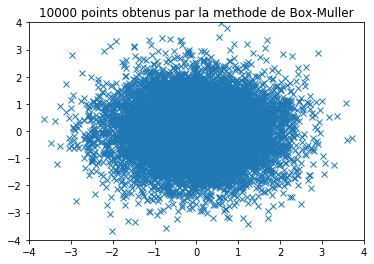

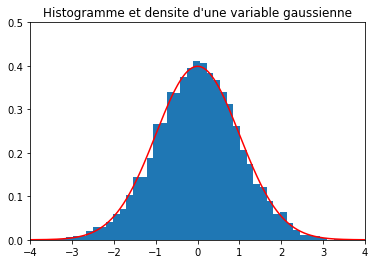

In [3]:
# fonction qui simule le couple (X,Y) issu de la methode de Box-Muller
def Box_Mul():
    R = (-2*log(random()))**0.5
    theta = 2*pi*random()
    return R*cos(theta), R*sin(theta)
#test
print("Une variable (X,Y) par  BOX Muller: ", Box_Mul() )
# Tirages contient les couples (X,Y)
sim = [Box_Mul() for i in range(N)]
x = [s[0] for s in sim] # x stocke les premieres coordonnees
y = [s[1] for s in sim] # et y les secondes

plt.plot(x, y, 'x')
plt.title("10000 points obtenus par la methode de Box-Muller")
plt.axis([-4,4,-4,4])
plt.show()

# L'histogramme, obtenu a partir de x
plt.hist(x, density=True, bins=50)
t = [i/float(n) for i in range(-4*n,4*n)]
plt.plot(t, [exp(-u**2/2)*(2*pi)**-0.5 for u in t], 'r') # La densite gausienne
plt.title("Histogramme et densite d'une variable gaussienne")
plt.axis([-4,4,0,0.5])
plt.show()


# 3 Lois discrètes obtenues à partir de lois continues

Une variable de loi geometrique(0.7):  1


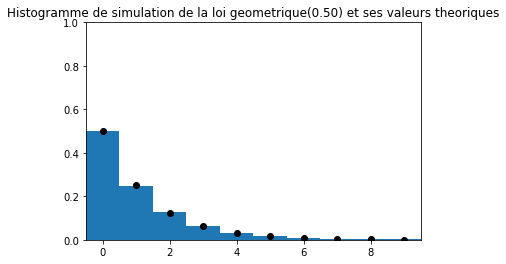

In [4]:
# fonction qui Simule une loi geometrique de parametre p
def geom(p):
    return int( log(random()) / log(p) )
 #test
print("Une variable de loi geometrique(0.7): ", geom(0.7) )  

# fct qui affiche l'histogramme de N simulations de variables aléatoires de loi géométrique de paramètres p
# et superposition avec le graphe des valeurs théoriques
def hist_geom(p):
    plt.hist([geom(p) for i in range(N)], density=True, bins=10, range=(-0.5,9.5))  #bins=10 pour p=0.5
    plt.plot(range(10), [p**k*(1-p) for k in range(10)], 'ko')
    plt.axis([-0.5,9.5,0,1])
    plt.title("Histogramme de simulation de la loi geometrique(%.2f) et ses valeurs theoriques"% (p))
    plt.show()

hist_geom(0.5)

Une variable de loi poisson(7):  8


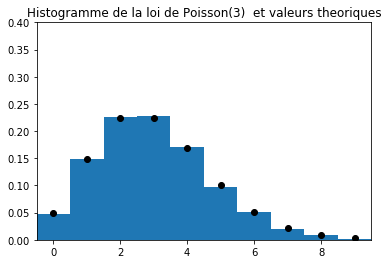

In [5]:
#Fonction qui simule une loi de Poisson de parametre lambdax
def poisson(lambdax):
    x = exp(-lambdax)
    U = random()
    n = 0
    while U>x:
        U *= random()
        n += 1
    return n
 #test
print("Une variable de loi poisson(7): ", poisson(7) )  

# fct qui affiche l'histogramme de N simulations de variables aléatoires de loi de poisson de paramètres l
# et superposition avec le graphe des valeurs théoriques
def hist_pois(l):
    plt.hist([poisson(l) for i in range(N)], density=True, bins=10, range=(-0.5,9.5))
    poisson_theorique = []
    prob = exp(-l) # pour chaque i, prob vaut exp(-l) * l^i/i!
    for i in range(10):
        poisson_theorique.append(prob)
        prob *= l/float(i+1)
    plt.plot(range(10), poisson_theorique, 'ko')
    plt.axis([-0.5,9.5,0,0.4])
    plt.title("Histogramme de la loi de Poisson(%d)  et valeurs theoriques"% (l))
    plt.show()
    
hist_pois(3)